In [1]:
import import_ipynb
import functions as fn
import numpy as np
import pandas as pd
from lstmcontroller import LstmController
from pidcontroller import PidController
import imageio
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from lstmcontroller.ipynb
importing Jupyter notebook from pidcontroller.ipynb


d:\programs\python 3.9\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
window = 15
layers = 2
batch_size = 100
drop = 0.1
units = 100
best_feature_threshold = 0.1

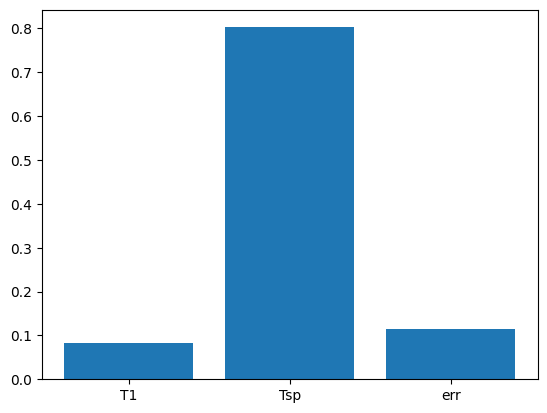

In [3]:
train_data = pd.read_csv('PID_train_data.csv')
train_data['err'] = train_data['Tsp'] - train_data['T1']

y = np.ravel(train_data[['Q1']])
X = train_data[['T1','Tsp','err']]
X = fn.select_best_features(X, y, best_feature_threshold)

0epoch [00:00, ?epoch/s]
  0%|                                                                                       | 0/350 [00:00<?, ?epoch/s]
  0%|                                                                                   | 0.00/35.0 [00:00<?, ?batch/s]
  3%|█▊                                                              | 1.00/35.0 [00:04<02:25, 4.27s/batch, loss=0.316]
  9%|█████▍                                                          | 3.00/35.0 [00:04<00:37, 1.16s/batch, loss=0.202]
 14%|█████████▏                                                      | 5.00/35.0 [00:04<00:17, 1.68batch/s, loss=0.136]
 20%|████████████▊                                                   | 7.00/35.0 [00:04<00:10, 2.70batch/s, loss=0.116]
 26%|████████████████▏                                              | 9.00/35.0 [00:04<00:06, 3.90batch/s, loss=0.0999]
 31%|███████████████████▊                                           | 11.0/35.0 [00:04<00:04, 5.29batch/s, loss=0.0865]
 37%|██████████

 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 15.5batch/s, loss=0.00518]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 15.3batch/s, loss=0.00528]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.0052]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.00526]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00521]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00521]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:02<00:00, 16.1batch/s, loss=0.00515]
  1%|▌                                              | 4/350 [00:14<17:53,  3.10s/epoch, loss=0.00524, val_loss=0.00511]
  0%|                                   

 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 15.4batch/s, loss=0.00451]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 15.3batch/s, loss=0.00428]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:00<00:01, 15.8batch/s, loss=0.00442]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:00<00:01, 16.1batch/s, loss=0.00442]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:01<00:01, 16.1batch/s, loss=0.00442]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:01<00:01, 16.3batch/s, loss=0.00435]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 16.4batch/s, loss=0.00442]
 63%|███████████████████████████████████████▌                       | 22.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.0044]
 69%|███████████████████████████████████

 91%|█████████████████████████████████████████████████████████▌     | 32.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.0035]
  3%|█▍                                            | 11/350 [00:31<13:32,  2.40s/epoch, loss=0.00345, val_loss=0.00373]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00345]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00322]
 11%|███████                                                       | 4.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00375]
 17%|██████████▋                                                   | 6.00/35.0 [00:00<00:01, 16.3batch/s, loss=0.00348]
 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 16.4batch/s, loss=0.00345]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 16.6batch/s, loss=0.00336]
 34%|█████████████████████▎             

 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.00241]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00243]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.00243]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:01<00:00, 16.2batch/s, loss=0.00244]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.00244]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.0025]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:01<00:00, 16.4batch/s, loss=0.00249]
  4%|██                                             | 15/350 [00:40<13:11,  2.36s/epoch, loss=0.00252, val_loss=0.0032]
  0%|                                   

 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.00202]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 15.7batch/s, loss=0.00197]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:00<00:01, 16.0batch/s, loss=0.00202]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:00<00:01, 16.1batch/s, loss=0.00201]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:01<00:01, 16.1batch/s, loss=0.00199]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:01<00:01, 16.3batch/s, loss=0.00202]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.00198]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 16.2batch/s, loss=0.00198]
 69%|███████████████████████████████████

 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.00142]
  6%|██▉                                            | 22/350 [00:57<12:56,  2.37s/epoch, loss=0.0014, val_loss=0.00145]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0014]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:02, 16.3batch/s, loss=0.00135]
 11%|███████                                                       | 4.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00141]
 17%|██████████▋                                                   | 6.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00155]
 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00145]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 16.4batch/s, loss=0.00143]
 34%|█████████████████████▎             

 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00109]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00109]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00108]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:01<00:00, 16.2batch/s, loss=0.00111]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.00108]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 16.4batch/s, loss=0.00109]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:01<00:00, 16.5batch/s, loss=0.00109]
  7%|███▋                                             | 26/350 [01:06<12:42,  2.35s/epoch, loss=0.0011, val_loss=0.001]
  0%|                                   

 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 13.8batch/s, loss=0.000957]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 14.1batch/s, loss=0.00102]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 14.4batch/s, loss=0.000979]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 14.6batch/s, loss=0.000958]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 14.7batch/s, loss=0.000948]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 15.2batch/s, loss=0.000976]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.7batch/s, loss=0.000965]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.000966]
 69%|███████████████████████████████████

 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:02<00:00, 15.8batch/s, loss=0.00101]
  9%|████▏                                       | 33/350 [01:23<12:33,  2.38s/epoch, loss=0.000996, val_loss=0.000583]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000996]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00121]
 11%|███████                                                       | 4.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00123]
 17%|██████████▋                                                   | 6.00/35.0 [00:00<00:01, 16.4batch/s, loss=0.00119]
 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 16.4batch/s, loss=0.00114]
 29%|██████████████████                                             | 10.0/35.0 [00:00<00:01, 16.4batch/s, loss=0.0011]
 34%|█████████████████████▎             

 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.00109]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.00106]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.00106]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00106]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.00106]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.00107]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:02<00:00, 16.1batch/s, loss=0.00109]
 11%|████▊                                         | 37/350 [01:32<12:22,  2.37s/epoch, loss=0.00109, val_loss=0.00153]
  0%|                                   

 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 14.7batch/s, loss=0.00107]
 29%|██████████████████                                             | 10.0/35.0 [00:00<00:01, 14.9batch/s, loss=0.0011]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:00<00:01, 15.2batch/s, loss=0.00107]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:00<00:01, 15.3batch/s, loss=0.00105]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:01<00:01, 15.4batch/s, loss=0.00102]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:01<00:01, 15.5batch/s, loss=0.00101]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000998]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.00103]
 69%|███████████████████████████████████

 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:02<00:00, 15.6batch/s, loss=0.00089]
 13%|█████▌                                      | 44/350 [01:50<12:29,  2.45s/epoch, loss=0.000899, val_loss=0.000276]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000899]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.00105]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.000907]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 16.2batch/s, loss=0.000863]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 16.4batch/s, loss=0.000926]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 16.3batch/s, loss=0.000921]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.000938]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.000921]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.000916]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:01<00:00, 15.5batch/s, loss=0.00092]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.000923]
 86%|████████████████████████████████████████████████████▎        | 30.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.000917]
 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 16.1batch/s, loss=0.000923]
 14%|██████▎                                       | 48/350 [01:59<12:00,  2.39s/epoch, loss=0.00093, val_loss=0.00036]
  0%|                                   

 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000813]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.6batch/s, loss=0.000817]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 15.9batch/s, loss=0.000814]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 15.9batch/s, loss=0.000799]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 16.1batch/s, loss=0.000815]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 16.2batch/s, loss=0.000818]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.000815]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.000811]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.5batch/s, loss=0.000801]
 16%|███████                                      | 55/350 [02:16<11:55,  2.43s/epoch, loss=0.000812, val_loss=0.00029]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000812]
  6%|███▍                                                         | 2.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.000599]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 16.1batch/s, loss=0.000801]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 16.1batch/s, loss=0.000752]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000732]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.9batch/s, loss=0.000718]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.7batch/s, loss=0.000776]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000768]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000746]
 74%|█████████████████████████████████████████████▎               | 26.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000751]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000757]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.00075]
 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.6batch/s, loss=0.000763]
 17%|███████▍                                    | 59/350 [02:26<11:49,  2.44s/epoch, loss=0.000768, val_loss=0.000278]
  0%|                                   

 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.5batch/s, loss=0.000737]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 15.3batch/s, loss=0.00073]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 15.5batch/s, loss=0.000733]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 15.9batch/s, loss=0.000714]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 15.9batch/s, loss=0.000712]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 15.8batch/s, loss=0.000721]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.000744]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.000754]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.1batch/s, loss=0.000796]
 19%|████████▎                                   | 66/350 [02:43<11:40,  2.46s/epoch, loss=0.000802, val_loss=0.000226]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000802]
  6%|███▍                                                         | 2.00/35.0 [00:00<00:02, 15.6batch/s, loss=0.000865]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000882]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 15.7batch/s, loss=0.000839]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.7batch/s, loss=0.000795]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.6batch/s, loss=0.000801]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.1batch/s, loss=0.000722]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.3batch/s, loss=0.000702]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 15.4batch/s, loss=0.000706]
 74%|█████████████████████████████████████████████▎               | 26.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000715]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.000707]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.00071]
 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 16.1batch/s, loss=0.000707]
 20%|████████▊                                   | 70/350 [02:53<11:23,  2.44s/epoch, loss=0.000711, val_loss=0.000673]
  0%|                                   

 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 15.2batch/s, loss=0.00083]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.4batch/s, loss=0.000819]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:00<00:01, 15.7batch/s, loss=0.00081]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 16.0batch/s, loss=0.000814]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 16.0batch/s, loss=0.000807]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 16.2batch/s, loss=0.000812]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.000789]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.000773]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.3batch/s, loss=0.000661]
 22%|█████████▋                                  | 77/350 [03:09<11:01,  2.42s/epoch, loss=0.000663, val_loss=0.000537]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000663]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:02, 16.4batch/s, loss=0.00074]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.000747]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 16.5batch/s, loss=0.000719]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 16.4batch/s, loss=0.000767]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 16.4batch/s, loss=0.000802]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.000688]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.7batch/s, loss=0.000683]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 15.9batch/s, loss=0.000682]
 74%|█████████████████████████████████████████████▎               | 26.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.000684]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.000683]
 86%|████████████████████████████████████████████████████▎        | 30.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.000682]
 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 16.1batch/s, loss=0.000688]
 23%|██████████▏                                 | 81/350 [03:19<10:42,  2.39s/epoch, loss=0.000686, val_loss=0.000391]
  0%|                                   

 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.0batch/s, loss=0.000742]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 14.9batch/s, loss=0.000742]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 15.4batch/s, loss=0.000749]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 15.7batch/s, loss=0.000725]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 15.9batch/s, loss=0.000729]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 16.1batch/s, loss=0.000722]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.000721]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 16.3batch/s, loss=0.000725]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.3batch/s, loss=0.000711]
 25%|███████████                                 | 88/350 [03:36<10:35,  2.43s/epoch, loss=0.000708, val_loss=0.000183]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000708]
  6%|███▍                                                         | 2.00/35.0 [00:00<00:02, 16.0batch/s, loss=0.000762]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000689]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 15.7batch/s, loss=0.000758]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.7batch/s, loss=0.000827]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.6batch/s, loss=0.000805]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.3batch/s, loss=0.000601]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.2batch/s, loss=0.000614]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 15.1batch/s, loss=0.000615]
 74%|█████████████████████████████████████████████▎               | 26.0/35.0 [00:01<00:00, 15.4batch/s, loss=0.000615]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 15.5batch/s, loss=0.000612]
 86%|████████████████████████████████████████████████████▎        | 30.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000602]
 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.8batch/s, loss=0.000611]
 26%|███████████▌                                | 92/350 [03:46<10:34,  2.46s/epoch, loss=0.000609, val_loss=0.000197]
  0%|                                   

 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000603]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 16.1batch/s, loss=0.000646]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 16.3batch/s, loss=0.000629]
 40%|████████████████████████▍                                    | 14.0/35.0 [00:00<00:01, 16.3batch/s, loss=0.000626]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:00<00:01, 16.3batch/s, loss=0.000634]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:01<00:01, 15.9batch/s, loss=0.00065]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.8batch/s, loss=0.000657]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.7batch/s, loss=0.000658]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.4batch/s, loss=0.000765]
 28%|████████████▍                               | 99/350 [04:03<10:16,  2.46s/epoch, loss=0.000775, val_loss=0.000368]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000775]
  6%|███▍                                                         | 2.00/35.0 [00:00<00:02, 15.5batch/s, loss=0.000705]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 15.5batch/s, loss=0.000704]
 17%|██████████▍                                                  | 6.00/35.0 [00:00<00:01, 15.6batch/s, loss=0.000761]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.6batch/s, loss=0.000761]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.6batch/s, loss=0.000702]
 34%|████████████████████▉              

 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 15.4batch/s, loss=0.000667]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 15.2batch/s, loss=0.000682]
 69%|█████████████████████████████████████████▊                   | 24.0/35.0 [00:01<00:00, 15.5batch/s, loss=0.000682]
 74%|█████████████████████████████████████████████▎               | 26.0/35.0 [00:01<00:00, 15.6batch/s, loss=0.000681]
 80%|████████████████████████████████████████████████▊            | 28.0/35.0 [00:01<00:00, 16.0batch/s, loss=0.000682]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:01<00:00, 16.1batch/s, loss=0.00068]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:02<00:00, 16.2batch/s, loss=0.00068]
 29%|████████████▉                               | 103/350 [04:13<10:03,  2.44s/epoch, loss=0.000681, val_loss=0.00026]
  0%|                                   

 23%|██████████████▏                                               | 8.00/35.0 [00:00<00:01, 15.6batch/s, loss=0.00059]
 29%|█████████████████▍                                           | 10.0/35.0 [00:00<00:01, 15.3batch/s, loss=0.000615]
 34%|████████████████████▉                                        | 12.0/35.0 [00:00<00:01, 15.5batch/s, loss=0.000601]
 40%|█████████████████████████▏                                     | 14.0/35.0 [00:00<00:01, 15.6batch/s, loss=0.0006]
 46%|███████████████████████████▉                                 | 16.0/35.0 [00:01<00:01, 15.8batch/s, loss=0.000617]
 51%|███████████████████████████████▎                             | 18.0/35.0 [00:01<00:01, 16.0batch/s, loss=0.000625]
 57%|██████████████████████████████████▊                          | 20.0/35.0 [00:01<00:00, 16.2batch/s, loss=0.000624]
 63%|██████████████████████████████████████▎                      | 22.0/35.0 [00:01<00:00, 16.2batch/s, loss=0.000627]
 69%|███████████████████████████████████

 91%|███████████████████████████████████████████████████████▊     | 32.0/35.0 [00:02<00:00, 15.3batch/s, loss=0.000691]
 31%|█████████████▌                             | 110/350 [04:30<09:48,  2.45s/epoch, loss=0.000694, val_loss=0.000228]
  0%|                                                                    | 0.00/35.0 [00:00<?, ?batch/s, loss=0.000694]
  6%|███▍                                                         | 2.00/35.0 [00:00<00:02, 15.5batch/s, loss=0.000635]
 11%|██████▉                                                      | 4.00/35.0 [00:00<00:01, 15.9batch/s, loss=0.000602]
 17%|██████████▋                                                   | 6.00/35.0 [00:00<00:01, 15.8batch/s, loss=0.00059]
 23%|█████████████▉                                               | 8.00/35.0 [00:00<00:01, 15.8batch/s, loss=0.000587]
 29%|█████████████████▋                                            | 10.0/35.0 [00:00<00:01, 16.0batch/s, loss=0.00065]
 34%|████████████████████▉              

Epoch 113: early stopping



 32%|█████████████▉                             | 113/350 [04:37<09:41,  2.46s/epoch, loss=0.000687, val_loss=0.000183]
d:\programs\python 3.9\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


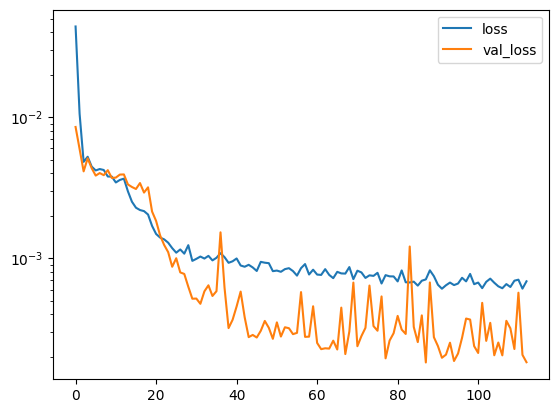

In [4]:
s_x = MinMaxScaler()
s_y = MinMaxScaler()
Xtrain, Xtest, ytrain, ytest = fn.create_train_and_test_data(X.values, y.reshape(-1, 1), s_x, s_y, window)
lstm = LstmController(s_x, s_y, Xtrain.shape, window, layers, drop, units)
lstm.train_model(Xtrain, ytrain, batch_size)
lstm.save_model('pid_emulate.h5', 'model_params.pkl')

In [5]:
yp = lstm.predict(Xtest)

Xtest_us = lstm.s_x.inverse_transform(Xtest[:,-1,:])
ytest_us = lstm.s_y.inverse_transform(ytest)

sp = Xtest_us[:,0]
pv = Xtest_us[:,0] + Xtest_us[:,1]

34/34 [==============================] - 1s 11ms/step


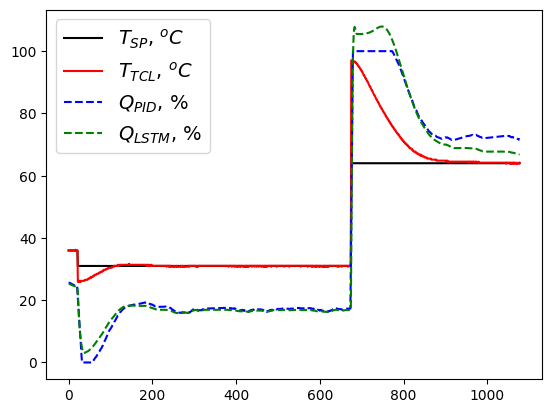

In [7]:
plt.plot(sp,'k-',label='$T_{SP}$, $^oC$')
plt.plot(pv, 'r-',label='$T_{TCL}$, $^oC$')
plt.plot(ytest_us,'b--',label='$Q_{PID}$, %')
plt.plot(yp,'g--',label='$Q_{LSTM}$, %')
plt.legend(loc='upper left',fontsize=14)
plt.savefig('LSTM_train.png')